### XOR :

In [1]:
import numpy as np
import tensorflow as tf


# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[-1],[1],[1],[-1]], "float32")

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9, input_dim=2, activation=tf.keras.activations.tanh))
model.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh))

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD(0.03),
              metrics=[tf.keras.metrics.binary_accuracy])

model.fit(training_data, target_data,epochs=500, verbose=2)

print(model.predict(training_data).round())

Epoch 1/500
1/1 - 0s - loss: 1.7031 - binary_accuracy: 0.0000e+00 - 299ms/epoch - 299ms/step
Epoch 2/500
1/1 - 0s - loss: 1.6601 - binary_accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 3/500
1/1 - 0s - loss: 1.6108 - binary_accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 4/500
1/1 - 0s - loss: 1.5553 - binary_accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 5/500
1/1 - 0s - loss: 1.4942 - binary_accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 6/500
1/1 - 0s - loss: 1.4297 - binary_accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 7/500
1/1 - 0s - loss: 1.3653 - binary_accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 8/500
1/1 - 0s - loss: 1.3054 - binary_accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 9/500
1/1 - 0s - loss: 1.2538 - binary_accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 10/500
1/1 - 0s - loss: 1.2130 - binary_accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 11/500
1/1 - 0s - loss: 1.1828 - binary_accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 12/500
1/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 2. 1.]


In [3]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]],dtype=ctypes.c_float)
Y = np.array([1, 1, -1, -1],dtype=ctypes.c_float)

In [4]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))
print(w_array)
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

[-0.49974632 -0.83783865 -0.7962837   0.5038264   0.43689084 -0.7622466
 -0.5669179   0.8009398  -0.02035785]


In [5]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.02,  # learning rate
    100,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))
print(pmc_trained_model)


[-0.6251401  -0.9608386  -1.0418719   0.27436316  0.78982913 -0.72538054
  0.13717876  0.65200764 -0.13255954]


In [6]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(100000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(0.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(0.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))
# print(pmc_predict_model)

In [7]:
tf_model = model.predict(X_to_predict).round()


3125/3125 [==============================] - 2s 774us/step


In [8]:
# PERMET DE SAVE NOTRE MODEL:
# tf.keras.Model.save(model,filepath='saved_model/my_model')

In [8]:
# predicted_labels_tf = []
predicted_labels_rust_lib = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

# for y in tf_model :
#     if y <= 0 :
#         predicted_labels_tf.append('cyan')
#     else :
#         predicted_labels_tf.append('purple')

for y in pmc_predict_model :
    if y <= 0 :
        predicted_labels_rust_lib.append('cyan')
    else :
        predicted_labels_rust_lib.append('purple')

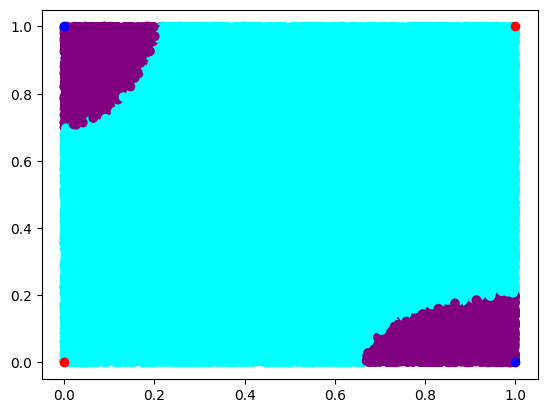

<Figure size 640x480 with 0 Axes>

In [10]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels_tf)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

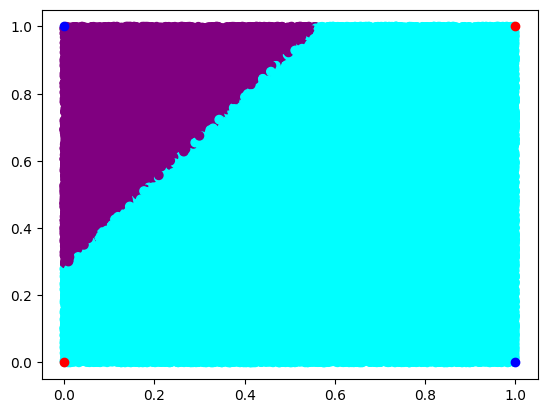

<Figure size 640x480 with 0 Axes>

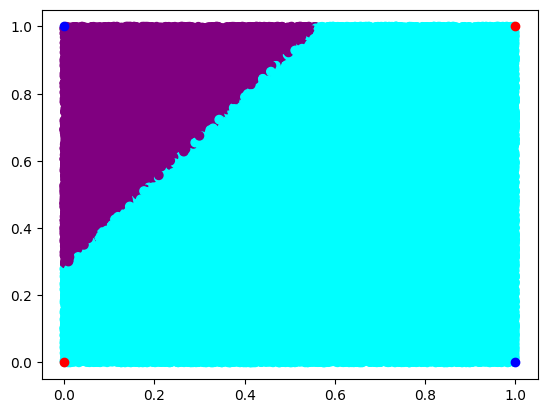

<Figure size 640x480 with 0 Axes>

In [10]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels_rust_lib)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [12]:
for layer in model.layers:
    print(layer.name)

dense
dense_1


In [15]:
couche = model.get_layer("dense")
print(couche.get_weights()[0])
couche = model.get_layer("dense_1")
print(couche.get_weights()[0])

[[ 0.340926   -0.19434136  0.38743585 -0.07057551 -0.5650916   1.7991295
   1.4318162  -0.47540608  0.67788786]
 [-0.47230077 -0.4139003   0.22939385  0.84498125  1.2829714   1.7514316
  -0.93915325 -0.2299558   0.10977815]]
[[ 0.07344493]
 [-0.16136827]
 [-0.84710497]
 [-0.7463312 ]
 [-1.2281914 ]
 [ 2.0865257 ]
 [-1.3563223 ]
 [ 0.77309597]
 [-0.11652631]]
